In [31]:
%pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# Importa bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Configurações para melhor visualização
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Adiciona o caminho da pasta 'src' ao sistema
# (../ sobe um nível, da pasta 'notebooks' para a raiz 'tech_challenge_voos')
sys.path.append('../') 

# Importa nossa função customizada de carregamento
from src.data_loader import load_datasets
from src.preprocessing import clean_flights 
from src.feature_engineering import create_target_variable
from src.modeling import create_preprocessing_pipeline

print("Bibliotecas e módulos importados com sucesso!")

Bibliotecas e módulos importados com sucesso!


In [33]:
# Carrega os dados usando a função do script .py
# (O caminho '../data/' sobe um nível e entra na pasta 'data')
df_flights, df_airlines, df_airports = load_datasets('../data/')

c:\Users\FSNO\Documents\tech_challenge_voos\notebooks\..\src\data_loader.py:18: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv(path_flights)


Datasets carregados com sucesso!


In [34]:
# Agora sim, a primeira análise!
if df_flights is not None:
    print("--- Informações de df_flights ---")
    df_flights.info()
else:
    print("Erro: DataFrame df_flights não foi carregado.")

--- Informações de df_flights ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23

In [35]:
# Célula 4: Verificando valores ausentes
if df_flights is not None:
    print("Contagem de valores ausentes (nulos) por coluna:")
    print(df_flights.isnull().sum())

Contagem de valores ausentes (nulos) por coluna:
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY        

In [36]:
# Célula 5: Aplicando a limpeza
if df_flights is not None:
    print(f"Tamanho original: {df_flights.shape}")
    
    df_flights_clean = clean_flights(df_flights)
    
    print(f"Tamanho limpo:    {df_flights_clean.shape}")
else:
    print("df_flights não carregado.")

Tamanho original: (5819079, 31)
Dataset limpo. De 5819079 linhas para 5714008 linhas.
Tamanho limpo:    (5714008, 27)


In [37]:
# Célula 6: Verificação final de nulos
if 'df_flights_clean' in locals():
    print("\nVerificando nulos no dataset limpo:")
    # .sum().sum() soma todos os nulos de todas as colunas
    print(df_flights_clean.isnull().sum().sum())
else:
    print("df_flights_clean não foi criado.")


Verificando nulos no dataset limpo:
0


In [38]:
# Célula 7: Estatísticas Descritivas (Numéricas)
if 'df_flights_clean' in locals():
    print("Estatísticas Descritivas (Dados Numéricos):")
    display(df_flights_clean.describe())
else:
    print("df_flights_clean não foi criado.")

Estatísticas Descritivas (Dados Numéricos):


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5714008.0,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06
mean,2015.0,6.547799e+00,1.570759e+01,3.932643e+00,2.164384e+03,1.328907e+03,1.335066e+03,9.294842e+00,1.606550e+01,1.357099e+03,1.418940e+02,1.370062e+02,1.135116e+02,8.244569e+02,1.471319e+03,7.429063e+00,1.493187e+03,1.476373e+03,4.407057e+00,2.508880e+00,1.417306e-02,3.530439e+00,4.368550e+00,5.425671e-01
std,0.0,3.397421e+00,8.774394e+00,1.985967e+00,1.754706e+03,4.835251e+02,4.964198e+02,3.688972e+01,8.882449e+00,4.980237e+02,7.531400e+01,7.421107e+01,7.223082e+01,6.086620e+02,5.218682e+02,5.618951e+00,5.069011e+02,5.259730e+02,3.927130e+01,1.317102e+01,9.251752e-01,2.204992e+01,2.075421e+01,8.887775e+00
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.058000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.681000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.500000e+02,1.508000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.211000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.740000e+02,1.680000e+02,1.440000e+02,1.065000e+03,1.911000e+03,9.000000e+00,1.917000e+03,1.916000e+03,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


Plotando a distribuição dos Atrasos na Chegada (ARRIVAL_DELAY)


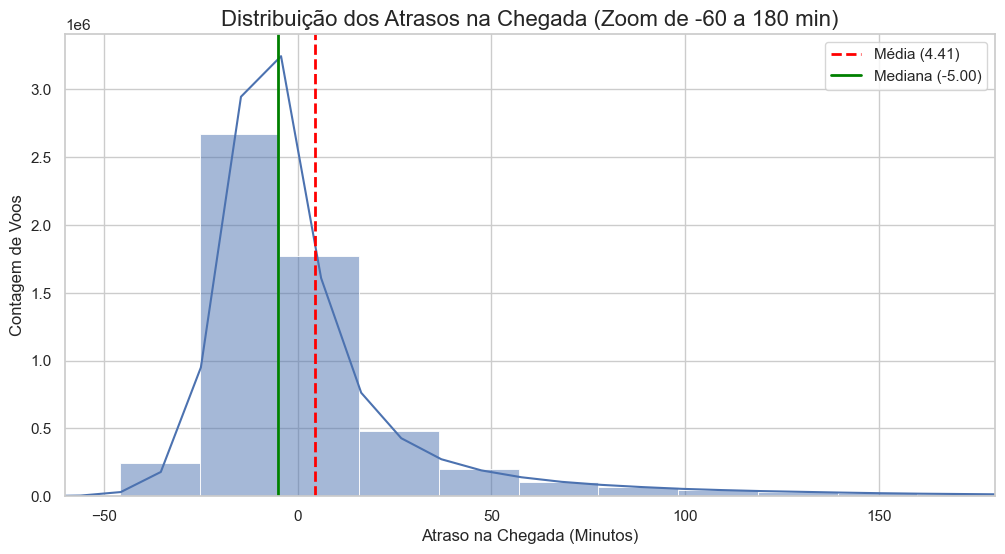

In [39]:
# Célula 8: Visualizando a distribuição dos atrasos na chegada
if 'df_flights_clean' in locals():
    print("Plotando a distribuição dos Atrasos na Chegada (ARRIVAL_DELAY)")
    
    plt.figure(figsize=(12, 6))
    
    # Usamos o `df_flights_clean`
    sns.histplot(df_flights_clean['ARRIVAL_DELAY'], bins=100, kde=True)
    
    # Linha vertical vermelha para a média (4.4 min)
    plt.axvline(
        df_flights_clean['ARRIVAL_DELAY'].mean(), 
        color='red', 
        linestyle='--', 
        linewidth=2, 
        label=f'Média ({df_flights_clean["ARRIVAL_DELAY"].mean():.2f})'
    )
    
    # Linha vertical verde para a mediana (-5.0 min)
    plt.axvline(
        df_flights_clean['ARRIVAL_DELAY'].median(), 
        color='green', 
        linestyle='-', 
        linewidth=2, 
        label=f'Mediana ({df_flights_clean["ARRIVAL_DELAY"].median():.2f})'
    )
    
    # Dando "zoom" em uma área de interesse
    # (Sem isso, o gráfico ficaria ilegível por causa dos outliers)
    plt.xlim(-60, 180) 
    
    plt.title('Distribuição dos Atrasos na Chegada (Zoom de -60 a 180 min)', fontsize=16)
    plt.xlabel('Atraso na Chegada (Minutos)')
    plt.ylabel('Contagem de Voos')
    plt.legend()
    plt.show()

else:
    print("df_flights_clean não foi criado.")

In [40]:
# Célula 9: Criando a Variável Alvo (Target)
if 'df_flights_clean' in locals():
    
    # Usamos a função do nosso script .py
    df_model_data = create_target_variable(df_flights_clean, delay_threshold=15)
    
    print("\nVerificando a distribuição da nova coluna 'IS_DELAYED':")
    # Mostra a contagem (0 = Não Atrasado, 1 = Atrasado) e a porcentagem
    display(df_model_data['IS_DELAYED'].value_counts(normalize=True))
    
else:
    print("df_flights_clean não foi criado.")

Coluna 'IS_DELAYED' criada com threshold de 15 minutos.

Verificando a distribuição da nova coluna 'IS_DELAYED':


IS_DELAYED
0    0.813889
1    0.186111
Name: proportion, dtype: float64

In [41]:
# Célula 10 (CORRIGIDA): Importações para Modelagem

import sys
import os

# Esta linha diz ao Python para "subir um nível" (../) 
# e procurar por módulos lá. É o que permite encontrar a pasta 'src'.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Agora estas importações vão funcionar
from sklearn.model_selection import train_test_split
from src.modeling import create_preprocessing_pipeline
from src.feature_engineering import engineer_time_features

print("Importações de modelagem carregadas com sucesso!")

Importações de modelagem carregadas com sucesso!


In [42]:
import pandas as pd
import numpy as np

# --- CÉLULA 1: Criar as colunas de Engenharia de Feature ---

try:
    print("Criando 'HOUR_OF_DAY' e 'PART_OF_DAY'...")
    
    # 1. Criar a coluna 'HOUR_OF_DAY'
    # // 100 faz a divisão inteira (ex: 1150 -> 11). 
    # % 24 garante que a hora '24' (meia-noite) vire '0'.
    df_flights_clean['HOUR_OF_DAY'] = (df_flights_clean['SCHEDULED_DEPARTURE'] // 100) % 24

    # 2. Definir os "cortes" (bins) e os "rótulos" (labels)
    # Bins:   -1 a 5 (Madrugada), 6 a 11 (Manhã), 12 a 17 (Tarde), 18 a 23 (Noite)
    bins = [-1, 5, 11, 17, 23]
    labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

    # 3. Criar a coluna 'PART_OF_DAY'
    df_flights_clean['PART_OF_DAY'] = pd.cut(
        df_flights_clean['HOUR_OF_DAY'], 
        bins=bins, 
        labels=labels, 
        right=True
    )
    
    print("-> Colunas 'HOUR_OF_DAY' e 'PART_OF_DAY' criadas com sucesso!")
    print("\n--- PREPARAÇÃO DO EIXO X CONCLUÍDA ---")

except KeyError:
    print("Erro: A coluna 'SCHEDULED_DEPARTURE' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro ao criar PART_OF_DAY: {e}")

Criando 'HOUR_OF_DAY' e 'PART_OF_DAY'...
-> Colunas 'HOUR_OF_DAY' e 'PART_OF_DAY' criadas com sucesso!

--- PREPARAÇÃO DO EIXO X CONCLUÍDA ---


In [43]:
import pandas as pd
import numpy as np

print("--- Célula 10.5: Preparação Final para Modelagem ---")

try:
    # --- 1. Criar Features de Engenharia ---
    # (Este é o código que estávamos depurando)
    print("Criando 'HOUR_OF_DAY' e 'PART_OF_DAY'...")
    
    # Garante que a coluna de hora está no formato certo
    df_flights_clean['SCHEDULED_DEPARTURE'] = df_flights_clean['SCHEDULED_DEPARTURE'].astype(int)
    
    # // 100 faz a divisão inteira (ex: 1150 -> 11). 
    df_flights_clean['HOUR_OF_DAY'] = (df_flights_clean['SCHEDULED_DEPARTURE'] // 100) % 24
    
    # Define os "cortes" (bins) e os "rótulos" (labels)
    bins = [-1, 5, 11, 17, 23]
    labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

    # Cria a coluna 'PART_OF_DAY'
    df_flights_clean['PART_OF_DAY'] = pd.cut(
        df_flights_clean['HOUR_OF_DAY'], 
        bins=bins, 
        labels=labels, 
        right=True
    )
    print("-> Features de engenharia criadas.")

    # --- 2. Criar a Variável Alvo (Target) ---
    print("Criando a variável alvo 'IS_DELAYED'...")
    LIMITE_ATRASO = 15 
    
    # (Vou usar 'IS_DELAYED' pois vi esse nome no seu código da Célula 11)
    df_flights_clean['IS_DELAYED'] = (df_flights_clean['ARRIVAL_DELAY'] > LIMITE_ATRASO).astype(int)
    print("-> Variável alvo 'IS_DELAYED' criada.")

    # --- 3. Definir as colunas FINAIS ---
    # Esta é a lista das 9 features + 1 target que o Modelo 11 espera
    FINAL_COLUMNS = [
        # Numéricas
        'MONTH', 
        'DAY_OF_WEEK', 
        'SCHEDULED_TIME', 
        'DISTANCE',
        'HOUR_OF_DAY',
        # Categóricas
        'AIRLINE', 
        'ORIGIN_AIRPORT', 
        'DESTINATION_AIRPORT',
        'PART_OF_DAY',
        # Alvo
        'IS_DELAYED' 
    ]
    
    # --- 4. Criar o DataFrame 'df_model_data_v2' ---
    # Seleciona apenas as colunas que vamos usar e remove Nulos
    # (O .dropna() aqui é uma segurança final, caso alguma feature nova tenha nulos)
    df_model_data_v2 = df_flights_clean[FINAL_COLUMNS].dropna()

    print("\n--- SUCESSO! ---")
    print("DataFrame 'df_model_data_v2' criado com sucesso.")
    print(f"Formato (shape) do dataset de modelagem: {df_model_data_v2.shape}")
    display(df_model_data_v2.head())

except KeyError as e:
    print(f"\n--- ERRO ---")
    print(f"Erro de Chave (KeyError): A coluna {e} não foi encontrada.")
    print("Certifique-se de que 'df_flights_clean' existe e tem as colunas originais (ex: 'SCHEDULED_DEPARTURE', 'ARRIVAL_DELAY').")
except Exception as e:
    print(f"\nOcorreu um erro inesperado: {e}")

--- Célula 10.5: Preparação Final para Modelagem ---
Criando 'HOUR_OF_DAY' e 'PART_OF_DAY'...
-> Features de engenharia criadas.
Criando a variável alvo 'IS_DELAYED'...
-> Variável alvo 'IS_DELAYED' criada.

--- SUCESSO! ---
DataFrame 'df_model_data_v2' criado com sucesso.
Formato (shape) do dataset de modelagem: (5714008, 10)


,MONTH,DAY_OF_WEEK,SCHEDULED_TIME,DISTANCE,HOUR_OF_DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,PART_OF_DAY,IS_DELAYED
0,1,4,205.0,1448,0,AS,ANC,SEA,Madrugada,0
1,1,4,280.0,2330,0,AA,LAX,PBI,Madrugada,0
2,1,4,286.0,2296,0,US,SFO,CLT,Madrugada,0
3,1,4,285.0,2342,0,AA,LAX,MIA,Madrugada,0
4,1,4,235.0,1448,0,AS,SEA,ANC,Madrugada,0


In [44]:
# --- CÉLULA 1: Criar a coluna-alvo (target) ---

# O desafio pede para prever se um voo vai atrasar.
# Vamos usar o padrão da indústria: um voo "atrasado" é aquele que chega
# 15 minutos ou mais após o horário programado.
LIMITE_ATRASO = 15 

try:
    # Cria a nova coluna. (df['col'] > X) vira True/False.
    # .astype(int) transforma True/False em 1/0, o que é perfeito para cálculos.
    df_flights_clean['ATRASOU_MAIS_15MIN'] = (df_flights_clean['ARRIVAL_DELAY'] > LIMITE_ATRASO).astype(int)
    
    print("Coluna 'ATRASOU_MAIS_15MIN' criada com sucesso!")
    
    # Vamos verificar a proporção (é um dataset desbalanceado?)
    # .value_counts(normalize=True) mostra a porcentagem
    print("\nProporção de voos Atrasados (1) vs. Não Atrasados (0):")
    print(df_flights_clean['ATRASOU_MAIS_15MIN'].value_counts(normalize=True))

except KeyError:
    print("Erro: A coluna 'ARRIVAL_DELAY' não foi encontrada. Verifique os passos anteriores.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Coluna 'ATRASOU_MAIS_15MIN' criada com sucesso!

Proporção de voos Atrasados (1) vs. Não Atrasados (0):
ATRASOU_MAIS_15MIN
0    0.820879
1    0.179121
Name: proportion, dtype: float64


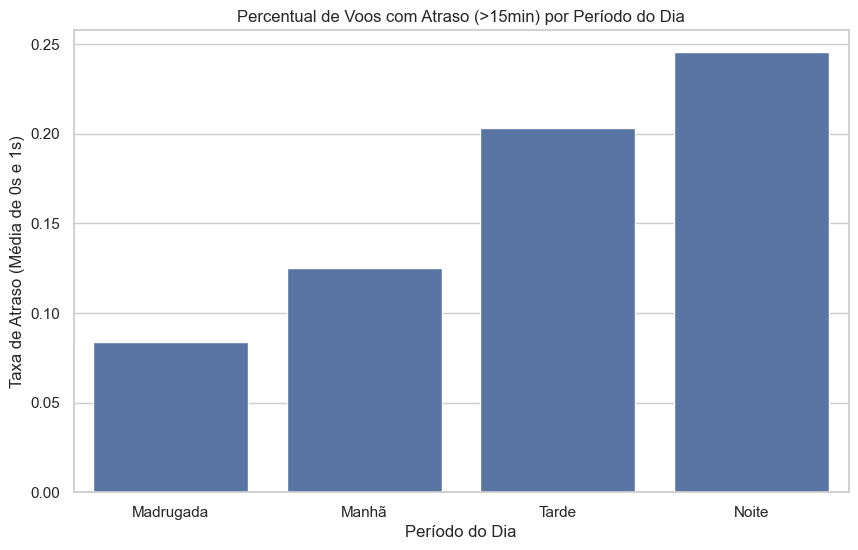

In [45]:
# --- CÉLULA 2: Gerar o gráfico (Agora vai funcionar) ---
import seaborn as sns
import matplotlib.pyplot as plt

# Define a ordem que você quer no eixo X
ordem_partes_dia = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

plt.figure(figsize=(10, 6))

# O sns.barplot, por padrão, calcula a MÉDIA de 'y' para cada 'x'
# Como 'y' é 0 ou 1, a média (ex: 0.22) é o mesmo que o percentual (22%)!
sns.barplot(
    x="PART_OF_DAY",
    y="ATRASOU_MAIS_15MIN", 
    data=df_flights_clean,
    order=ordem_partes_dia,
    errorbar=None
)

plt.title('Percentual de Voos com Atraso (>15min) por Período do Dia')
plt.ylabel('Taxa de Atraso (Média de 0s e 1s)')
plt.xlabel('Período do Dia')
plt.show()

In [46]:
# Célula 11 (MODIFICADA - VERSÃO CORRETA COM 9 FEATURES)

if 'df_model_data_v2' in locals():
    
    # 1. Definir NOVAS colunas de features (X)
    numeric_features = [
        'MONTH', 
        'DAY_OF_WEEK', 
        'SCHEDULED_TIME', 
        'DISTANCE',
        'HOUR_OF_DAY'  # <-- Feature 5
    ]
    
    categorical_features = [
        'AIRLINE',             # Feature 6
        'ORIGIN_AIRPORT',      # Feature 7
        'DESTINATION_AIRPORT', # Feature 8
        'PART_OF_DAY'          # <-- Feature 9
    ]
    
    TARGET = 'IS_DELAYED'
    
    # Garantir que as categóricas são strings (para o encoder)
    df_model_ready = df_model_data_v2.copy()
    for col in categorical_features:
        df_model_ready[col] = df_model_ready[col].astype(str)
            
    # 2. Definir X e y a partir dos dados v2
    FEATURES = numeric_features + categorical_features
    X = df_model_ready[FEATURES]
    y = df_model_ready[TARGET]
    
    # 3. Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
    )
    
    print("Dados divididos em Treino e Teste (com Novas Features):")
    print(f"X_train shape: {X_train.shape}") # <-- DEVE MOSTRAR (..., 9)
    print(f"X_test shape:  {X_test.shape}") # <-- DEVE MOSTRAR (..., 9)
    
else:
    print("Erro: df_model_data_v2 não foi criado. Rode a célula 'Nova Célula' (C-10.5) primeiro.")

Dados divididos em Treino e Teste (com Novas Features):
X_train shape: (4571206, 9)
X_test shape:  (1142802, 9)


In [47]:
# Célula 12: Criando o pipeline de pré-processamento
if 'numeric_features' in locals() and 'categorical_features' in locals():
    
    # Usamos a função do nosso script .py
    preprocessor = create_preprocessing_pipeline(numeric_features, categorical_features)
    
    print("\nDefinição do Pré-processador:")
    display(preprocessor)
    
else:
    print("Erro: Listas 'numeric_features' ou 'categorical_features' não definidas.")
    print("Por favor, rode a Célula 11 primeiro.")

Pipeline de pré-processamento (ColumnTransformer) criado com sucesso.

Definição do Pré-processador:


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [48]:
# Célula 13: Criar e Treinar o Pipeline (Baseline - LogisticRegression)

# 1. Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import time # Para marcar o tempo de treino

# 2. Criar o Pipeline completo
# Ele combina o pré-processador (passo 'preprocessor')
# com o modelo de classificação (passo 'classifier')
model_lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # Nosso ColumnTransformer da Célula 12
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)) 
    # max_iter=1000 ajuda o modelo a convergir com mais dados
])

# 3. Treinar o modelo!
print("Iniciando o treinamento do modelo LogisticRegression...")
start_time = time.time()

# O .fit() aqui dispara todo o processo (Scaler, OneHotEncoder E o treino)
model_lr_pipe.fit(X_train, y_train) 

end_time = time.time()
print(f"Treinamento do LogisticRegression concluído em {(end_time - start_time):.2f} segundos.")

print("\nModelo baseline (LogisticRegression) treinado com sucesso!")
display(model_lr_pipe)

Iniciando o treinamento do modelo LogisticRegression...
Treinamento do LogisticRegression concluído em 29.30 segundos.

Modelo baseline (LogisticRegression) treinado com sucesso!


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Avaliando o modelo LogisticRegression nos dados de TESTE...

Relatório de Classificação (LogisticRegression):
                  precision    recall  f1-score   support

0 (Não Atrasado)       0.82      1.00      0.90    938102
    1 (Atrasado)       0.47      0.00      0.00    204700

        accuracy                           0.82   1142802
       macro avg       0.64      0.50      0.45   1142802
    weighted avg       0.76      0.82      0.74   1142802

Plotando Matriz de Confusão (LogisticRegression):


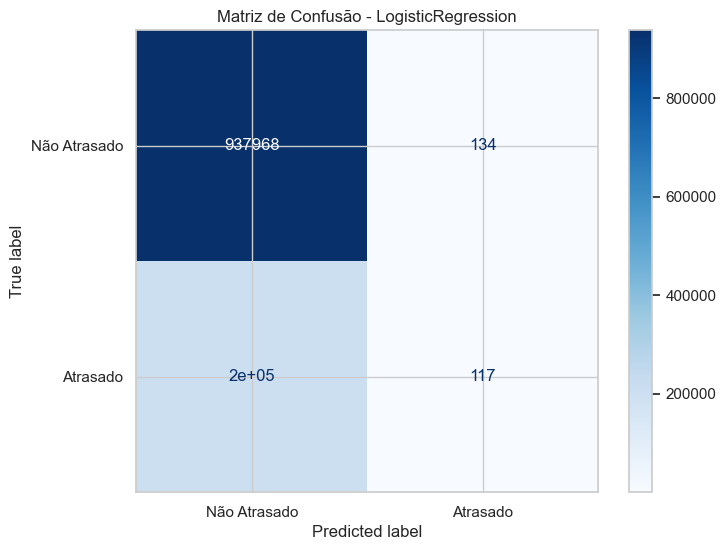

In [49]:
# Célula 14: Avaliando o Modelo Baseline (LogisticRegression)

# 1. Importações necessárias
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Avaliando o modelo LogisticRegression nos dados de TESTE...")

# 2. Fazer previsões nos dados de teste (X_test)
# O .predict() aqui dispara todo o pipeline (Scaler, OneHotEncoder E a previsão)
y_pred_lr = model_lr_pipe.predict(X_test)

# 3. Gerar o Relatório de Classificação
print("\nRelatório de Classificação (LogisticRegression):")
# target_names dá nomes mais claros para '0' e '1'
report_lr = classification_report(
    y_test, 
    y_pred_lr, 
    target_names=['0 (Não Atrasado)', '1 (Atrasado)']
)
print(report_lr)

# 4. Gerar a Matriz de Confusão
print("Plotando Matriz de Confusão (LogisticRegression):")

fig, ax = plt.subplots(figsize=(8, 6))
# Plota a matriz usando os valores reais (y_test) vs. os previstos (y_pred_lr)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_lr, 
    ax=ax, 
    cmap='Blues',
    display_labels=['Não Atrasado', 'Atrasado']
)
plt.title('Matriz de Confusão - LogisticRegression')
plt.show()

Iniciando o treinamento do Modelo 2 (LogisticRegression com class_weight='balanced')
Treinamento concluído em 49.73 segundos.

Avaliando o modelo (LogisticRegression com class_weight='balanced') nos dados de TESTE...

Relatório de Classificação (LR com class_weight):
                  precision    recall  f1-score   support

0 (Não Atrasado)       0.88      0.58      0.70    938102
    1 (Atrasado)       0.25      0.63      0.36    204700

        accuracy                           0.59   1142802
       macro avg       0.56      0.61      0.53   1142802
    weighted avg       0.77      0.59      0.64   1142802

Plotando Matriz de Confusão (LR com class_weight):


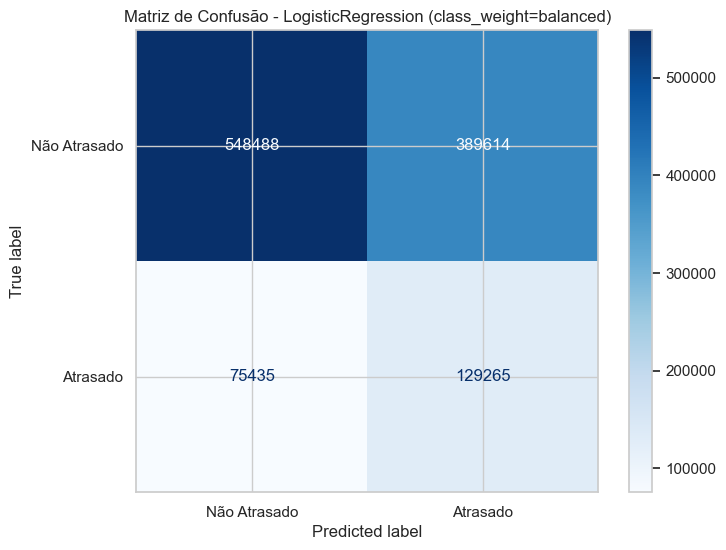

In [50]:
# Célula 15 (CORRIGIDA E COMPLETA): Treinar e Avaliar Modelo 2

# --- Importações necessárias (resolvendo NameErrors) ---
import time
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# --------------------------------------------------------

print("Iniciando o treinamento do Modelo 2 (LogisticRegression com class_weight='balanced')")
start_time = time.time()

# 1. Criar um NOVO pipeline
# (Certifique-se de que 'preprocessor', X_train, y_train existem das células 11 e 12)
model_lr_balanced_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42, 
        max_iter=1000,
        class_weight='balanced'
    )) 
])

# 2. Treinar o novo modelo
model_lr_balanced_pipe.fit(X_train, y_train) 

end_time = time.time()
print(f"Treinamento concluído em {(end_time - start_time):.2f} segundos.")

# 3. Avaliar o novo modelo
print("\nAvaliando o modelo (LogisticRegression com class_weight='balanced') nos dados de TESTE...")

y_pred_lr_balanced = model_lr_balanced_pipe.predict(X_test)

print("\nRelatório de Classificação (LR com class_weight):")
report_lr_balanced = classification_report(
    y_test, 
    y_pred_lr_balanced, 
    target_names=['0 (Não Atrasado)', '1 (Atrasado)']
)
print(report_lr_balanced)

# 4. Nova Matriz de Confusão
print("Plotando Matriz de Confusão (LR com class_weight):")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_lr_balanced, 
    ax=ax, 
    cmap='Blues',
    display_labels=['Não Atrasado', 'Atrasado']
)
plt.title('Matriz de Confusão - LogisticRegression (class_weight=balanced)')
plt.show()

In [51]:
# Célula 15.5: Verificando as Features do Modelo Treinado

print("Inspecionando as features que o modelo (Célula 15) realmente usou:")

try:
    # 1. Pega os nomes das features DEPOIS do ColumnTransformer
    # (ex: 'num__HOUR_OF_DAY', 'cat__PART_OF_DAY_Manhã')
    feature_names = model_lr_balanced_pipe.named_steps['preprocessor'].get_feature_names_out()
    
    # 2. Pega os coeficientes (importância) do modelo LogReg
    coefficients = model_lr_balanced_pipe.named_steps['classifier'].coef_[0]
    
    # 3. Cria um DataFrame para visualização fácil
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    print("Top 10 features que o modelo mais usou:")
    display(coef_df.head(10))
    
    print("\nÚltimas 10 features que o modelo usou:")
    display(coef_df.tail(10))
    
    # 4. Verificação final
    if 'num__SCHEDULED_DEPARTURE' in coef_df['Feature'].values:
        print("\n--- VEREDITO ---")
        print("FALHA NO PIPELINE: O modelo usou a feature ANTIGA ('SCHEDULED_DEPARTURE').")
        print("Causa provável: A Célula 11 ou 12 não foi re-executada antes da Célula 15.")
        
    elif 'num__HOUR_OF_DAY' in coef_df['Feature'].values:
        print("\n--- VEREDITO ---")
        print("PIPELINE CORRETO: O modelo usou as features NOVAS ('HOUR_OF_DAY', 'PART_OF_DAY').")
        print("Conclusão: As novas features não melhoraram o desempenho do LogisticRegression.")
    else:
        print("\n--- VEREDITO ---")
        print("Verifique a lista de features manualmente.")

except Exception as e:
    print(f"Ocorreu um erro ao inspecionar o modelo: {e}")
    print("Por favor, certifique-se de que as Células 11, 12 e 15 foram executadas.")

Inspecionando as features que o modelo (Célula 15) realmente usou:
Top 10 features que o modelo mais usou:


,Feature,Coefficient
1091,cat__DESTINATION_AIRPORT_GUM,1.377700
559,cat__ORIGIN_AIRPORT_PBG,1.203313
367,cat__ORIGIN_AIRPORT_BQN,0.961037
1095,cat__DESTINATION_AIRPORT_HNL,0.891874
507,cat__ORIGIN_AIRPORT_LGA,0.795587
806,cat__DESTINATION_AIRPORT_12523,0.762690
1136,cat__DESTINATION_AIRPORT_LGA,0.753715
155,cat__ORIGIN_AIRPORT_12197,0.746240
1232,cat__DESTINATION_AIRPORT_SFO,0.739007
1051,cat__DESTINATION_AIRPORT_EGE,0.732554



Últimas 10 features que o modelo usou:


,Feature,Coefficient
388,cat__ORIGIN_AIRPORT_CLD,-0.877137
1000,cat__DESTINATION_AIRPORT_BTM,-0.907842
178,cat__ORIGIN_AIRPORT_12758,-0.975744
988,cat__DESTINATION_AIRPORT_BJI,-0.995470
495,cat__ORIGIN_AIRPORT_KOA,-1.017157
170,cat__ORIGIN_AIRPORT_12402,-1.041584
509,cat__ORIGIN_AIRPORT_LIH,-1.149272
997,cat__DESTINATION_AIRPORT_BRD,-1.182902
1143,cat__DESTINATION_AIRPORT_LWS,-1.188470
487,cat__ORIGIN_AIRPORT_ITO,-1.246445



--- VEREDITO ---
PIPELINE CORRETO: O modelo usou as features NOVAS ('HOUR_OF_DAY', 'PART_OF_DAY').
Conclusão: As novas features não melhoraram o desempenho do LogisticRegression.


In [52]:
# Célula 16: Preparando Dados para Clusterização (Não Supervisionado)

# 1. Importações necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Preparando dados para clusterização de aeroportos...")

# 2. Criar um DataFrame de 'features' por aeroporto
# Vamos focar nos aeroportos de ORIGEM
airport_features = df_flights_clean.groupby('ORIGIN_AIRPORT').agg(
    
    # Contagem total de voos saindo
    total_flights=('FLIGHT_NUMBER', 'count'),
    
    # Média de atraso na SAÍDA
    avg_departure_delay=('DEPARTURE_DELAY', 'mean'),
    
    # Porcentagem de voos que saíram atrasados (> 15 min)
    pct_delayed_departures=('DEPARTURE_DELAY', lambda x: (x > 15).mean())
    
).reset_index()


# 3. Escalonar (Padronizar) os dados
# K-Means é muito sensível à escala. Não podemos comparar 'total_flights' 
# (que vai a 100.000) com 'pct_delayed' (que vai de 0 a 1).
scaler = StandardScaler()

# Salvamos os nomes dos aeroportos antes de escalonar
airport_names = airport_features['ORIGIN_AIRPORT']

# Removemos o nome para escalar apenas os números
features_to_scale = airport_features.drop(columns=['ORIGIN_AIRPORT'])

# Escalona
features_scaled = scaler.fit_transform(features_to_scale)

print("\nFeatures dos aeroportos prontas e escalonadas.")
print(f"Total de aeroportos únicos: {len(airport_features)}")
display(airport_features.head())

Preparando dados para clusterização de aeroportos...

Features dos aeroportos prontas e escalonadas.
Total de aeroportos únicos: 929


,ORIGIN_AIRPORT,total_flights,avg_departure_delay,pct_delayed_departures
0,10135,226,10.075221,0.154867
1,10136,181,2.270718,0.121547
2,10140,1702,5.603995,0.130435
3,10141,66,1.803030,0.090909
4,10146,81,9.740741,0.123457


Executando o Método do Cotovelo para K de 1 a 10...
Plotando o gráfico do Método do Cotovelo...


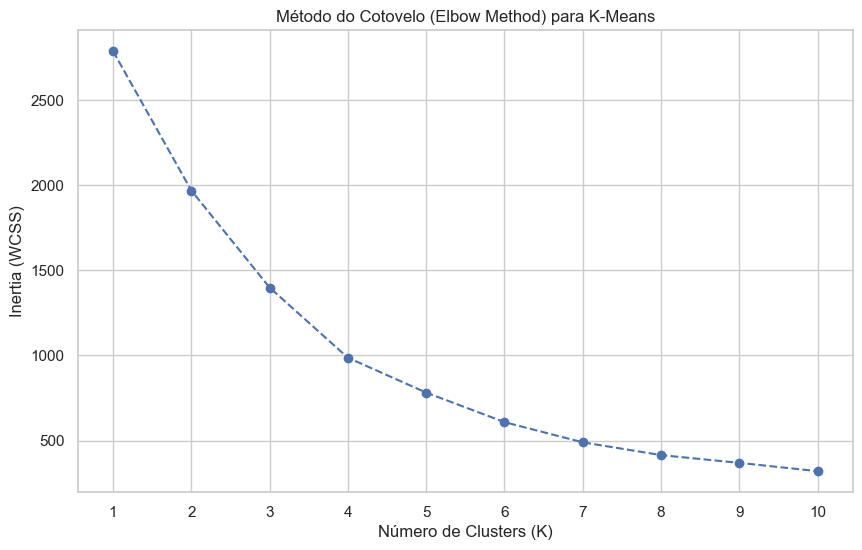

In [53]:
# Célula 17: Método do Cotovelo (Elbow Method) para encontrar o K ideal

if 'features_scaled' in locals():
    print("Executando o Método do Cotovelo para K de 1 a 10...")
    
    inertia_list = []  # Lista para guardar a inércia de cada K
    k_range = range(1, 11) # Vamos testar K de 1 a 10
    
    for k in k_range:
        # Cria e treina o modelo K-Means para o 'k' atual
        kmeans = KMeans(
            n_clusters=k, 
            random_state=42, 
            n_init=10 # n_init=10 para suprimir warnings
        )
        kmeans.fit(features_scaled)
        
        # Adiciona a inércia (WCSS) à lista
        inertia_list.append(kmeans.inertia_)
    
    # Plotar o gráfico do cotovelo
    print("Plotando o gráfico do Método do Cotovelo...")
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_list, marker='o', linestyle='--')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Método do Cotovelo (Elbow Method) para K-Means')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

else:
    print("Erro: 'features_scaled' não foi criado. Rode a Célula 16 primeiro.")

K-Means executado com K=4.
DataFrame com clusters:


,ORIGIN_AIRPORT,total_flights,avg_departure_delay,pct_delayed_departures,cluster
0,10135,226,10.075221,0.154867,1
1,10136,181,2.270718,0.121547,1
2,10140,1702,5.603995,0.130435,1
3,10141,66,1.803030,0.090909,2
4,10146,81,9.740741,0.123457,1



--- Interpretação dos Clusters (Médias) ---


,total_flights,avg_departure_delay,pct_delayed_departures,airport_count
cluster,,,,
3,101.235294,37.937567,0.376775,34
2,560.248677,-1.489982,0.053139,378
1,4524.351626,7.555529,0.151622,492
0,130912.440000,10.441565,0.193342,25



--- Visualização dos Clusters ---


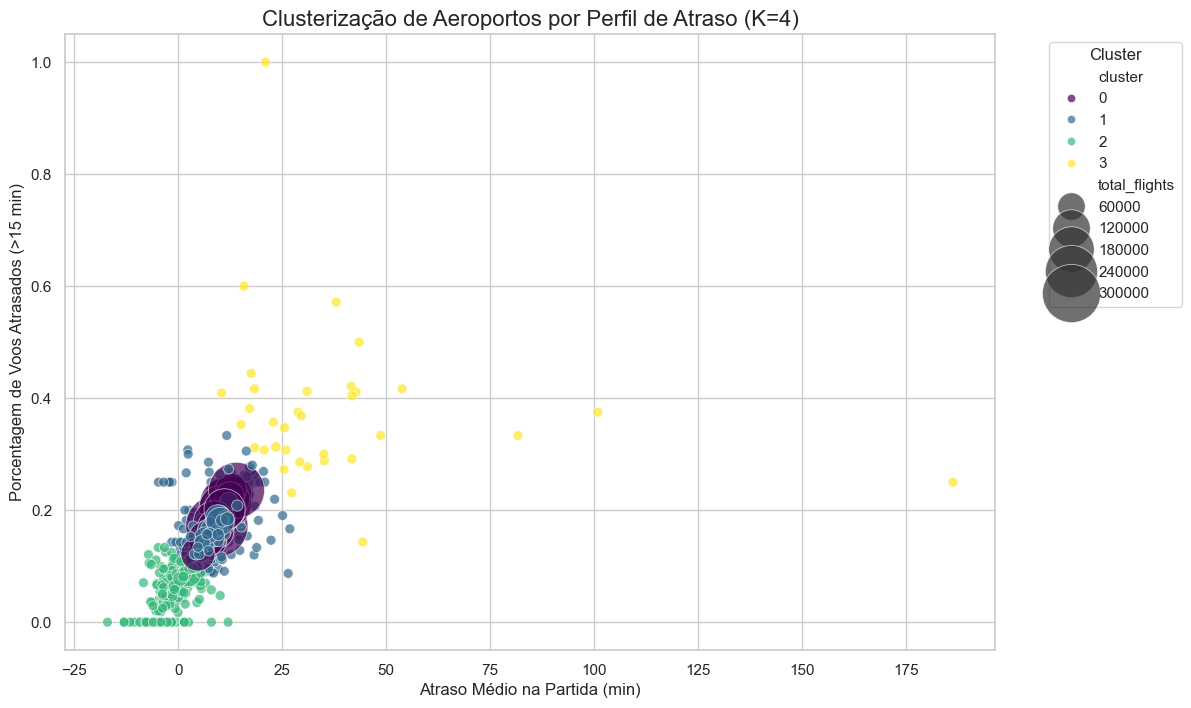

In [54]:
# Célula 18: Rodando K-Means (K=4) e Analisando os Clusters

if 'features_scaled' in locals() and 'airport_features' in locals():
    
    # 1. Definir o número de clusters com base no nosso "Cotovelo"
    K_IDEAL = 4
    
    # 2. Rodar o modelo K-Means final
    kmeans = KMeans(
        n_clusters=K_IDEAL, 
        random_state=42, 
        n_init=10
    )
    kmeans.fit(features_scaled)
    
    # 3. Adicionar os rótulos dos clusters de volta ao DataFrame original
    airport_features_clustered = airport_features.copy()
    airport_features_clustered['cluster'] = kmeans.labels_
    
    print(f"K-Means executado com K={K_IDEAL}.")
    print("DataFrame com clusters:")
    display(airport_features_clustered.head())
    
    # 4. Interpretar os Clusters
    # (Esta é a parte mais importante!)
    # Vamos calcular a média de cada feature para cada cluster
    print("\n--- Interpretação dos Clusters (Médias) ---")
    cluster_interpretation = airport_features_clustered.groupby('cluster').agg({
        'total_flights': 'mean',
        'avg_departure_delay': 'mean',
        'pct_delayed_departures': 'mean',
        'ORIGIN_AIRPORT': 'count'  # Para ver quantos aeroportos em cada cluster
    }).rename(columns={'ORIGIN_AIRPORT': 'airport_count'}).sort_values(by='total_flights')
    
    display(cluster_interpretation)
    
    # 5. Visualizar os Clusters (Requisito Obrigatório)
    print("\n--- Visualização dos Clusters ---")
    
    # Vamos plotar Atraso Médio vs. % de Voos Atrasados
    # O tamanho (size) do ponto será o Total de Voos
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=airport_features_clustered,
        x='avg_departure_delay',
        y='pct_delayed_departures',
        hue='cluster',         # Cor por cluster
        size='total_flights',  # Tamanho por volume de voos
        sizes=(50, 2000),      # Range dos tamanhos
        palette='viridis',     # Esquema de cores
        alpha=0.7
    )
    
    plt.title(f'Clusterização de Aeroportos por Perfil de Atraso (K={K_IDEAL})', fontsize=16)
    plt.xlabel('Atraso Médio na Partida (min)')
    plt.ylabel('Porcentagem de Voos Atrasados (>15 min)')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

else:
    print("Erro: 'features_scaled' ou 'airport_features' não criados. Rode as células anteriores.")

In [ ]:
# Célula 19: Treinar o Modelo 3 (RandomForestClassifier em uma Amostra)

# 1. Importações necessárias
from sklearn.ensemble import RandomForestClassifier

# 2. Criar uma amostra de 10% dos dados de treino (para velocidade)
# RandomForest é computacionalmente caro. Vamos usar 450k linhas.
print("Criando amostra de 10% dos dados de treino (aprox. 450k linhas)...")
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, 
    train_size=0.1,  # 10% dos dados
    random_state=42, 
    stratify=y_train # Mantém a proporção de 81/19 na amostra
)

print(f"Tamanho da amostra de treino: {X_train_sample.shape}")

# 3. Criar o Pipeline completo
print("Iniciando o treinamento do Modelo 3 (RandomForestClassifier)...")
start_time = time.time()

model_rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42, 
        class_weight='balanced', # Crucial para o desbalanceamento
        n_jobs=-1                # Usar todos os processadores
    )) 
])

# 4. Treinar o modelo (NA AMOSTRA!)
model_rf_pipe.fit(X_train_sample, y_train_sample) 

end_time = time.time()
print(f"Treinamento do RandomForest concluído em {(end_time - start_time):.2f} segundos.")

Criando amostra de 10% dos dados de treino (aprox. 450k linhas)...
Tamanho da amostra de treino: (1371361, 9)
Iniciando o treinamento do Modelo 3 (RandomForestClassifier)...



Avaliando o modelo (RandomForestClassifier) nos dados de TESTE COMPLETOS...

Relatório de Classificação (RandomForestClassifier):
                  precision    recall  f1-score   support

0 (Não Atrasado)       0.83      0.92      0.88    938102
    1 (Atrasado)       0.30      0.15      0.20    204700

        accuracy                           0.78   1142802
       macro avg       0.57      0.54      0.54   1142802
    weighted avg       0.74      0.78      0.75   1142802

Plotando Matriz de Confusão (RandomForestClassifier):


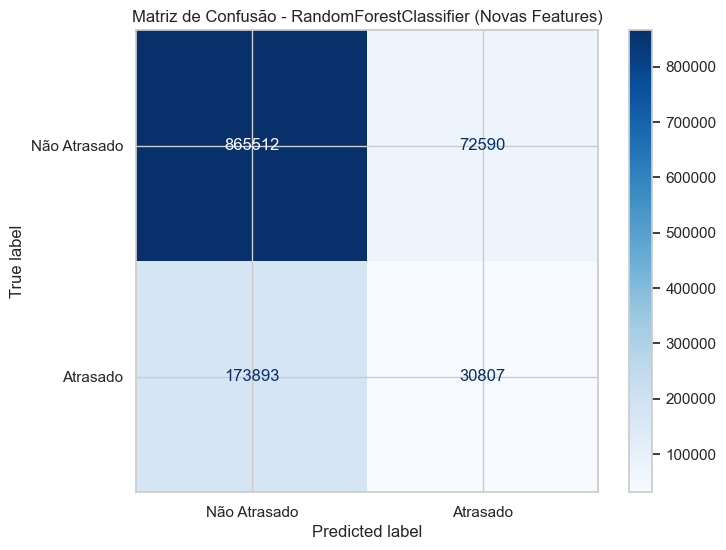

In [56]:
# Célula 20: Avaliando o Modelo 3 (RandomForestClassifier)

print("\nAvaliando o modelo (RandomForestClassifier) nos dados de TESTE COMPLETOS...")

# 1. Importações (caso o kernel tenha sido reiniciado)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Fazer previsões (no X_test completo)
# (Certifique-se que model_rf_pipe existe da Célula 19)
y_pred_rf = model_rf_pipe.predict(X_test)

# 3. Gerar o Relatório de Classificação
print("\nRelatório de Classificação (RandomForestClassifier):")
report_rf = classification_report(
    y_test, 
    y_pred_rf, 
    target_names=['0 (Não Atrasado)', '1 (Atrasado)']
)
print(report_rf)

# 4. Gerar a Matriz de Confusão
print("Plotando Matriz de Confusão (RandomForestClassifier):")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_rf, 
    ax=ax, 
    cmap='Blues',
    display_labels=['Não Atrasado', 'Atrasado']
)
plt.title('Matriz de Confusão - RandomForestClassifier (Novas Features)')
plt.show()

In [57]:
# --- Célula 21: Importância das Features (RandomForest) ---
import pandas as pd
print("\n--- Importância das Features (Feature Importances) ---")

try:
    # 1. Pega os nomes das features DEPOIS do ColumnTransformer
    # (ex: 'num__HOUR_OF_DAY', 'cat__PART_OF_DAY_Manhã')
    feature_names = model_rf_pipe.named_steps['preprocessor'].get_feature_names_out()
    
    # 2. Pega as importâncias do classificador
    importances = model_rf_pipe.named_steps['classifier'].feature_importances_
    
    # 3. Cria um DataFrame para visualização fácil
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Top 15 features mais importantes para o RandomForest:")
    display(importance_df.head(15))
    
    # 4. Verificação final
    if 'num__HOUR_OF_DAY' in importance_df['Feature'].head(5).values:
         print("\n--- VEREDITO ---")
         print("SUCESSO: O RandomForest usou suas features de engenharia (HOUR_OF_DAY)!")
    else:
         print("\n--- VEREDITO ---")
         print("Interessante... o RandomForest achou outras features mais importantes.")

except Exception as e:
    print(f"Ocorreu um erro ao extrair feature importance: {e}")


--- Importância das Features (Feature Importances) ---
Top 15 features mais importantes para o RandomForest:


,Feature,Importance
1,num__DAY_OF_WEEK,0.172328
0,num__MONTH,0.154423
2,num__SCHEDULED_TIME,0.142527
4,num__HOUR_OF_DAY,0.087527
3,num__DISTANCE,0.066319
1270,cat__PART_OF_DAY_Manhã,0.009135
1271,cat__PART_OF_DAY_Noite,0.007934
1272,cat__PART_OF_DAY_Tarde,0.005799
8,cat__AIRLINE_DL,0.005357
18,cat__AIRLINE_WN,0.004726



--- VEREDITO ---
SUCESSO: O RandomForest usou suas features de engenharia (HOUR_OF_DAY)!
